# Principal Component Analysis Applied on Network Output
*by Viviane Kakerbeck*

### Import Depenencies

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#from numpy.random import multivariate_normal as multNorm
from statsmodels.multivariate.pca import PCA
from scipy.spatial import distance_matrix
from scipy.cluster.vq import kmeans, vq
#from sklearn.decomposition.pca import PCA
from PIL import Image
import pickle
import os
from pylab import *
import seaborn as sns
import pandas as pd

In [7]:
path = "/Users/ingen/Dropbox/QUATAS/Stimuli/FinishedTaskStimuli/"
#path = "C:/Users/vivia/Dropbox/QUATAS/Stimuli/FinishedTaskStimuli/"
allfiles = os.listdir(path+"0/")

### Load Images

In [9]:
for i in range(8):
    if i==0:
        immatrix = np.asarray([np.array(Image.open(path + str(i)+"/"+im).resize((100,100))).flatten() for im in allfiles],'f')
    else:
        partimmatrix = np.asarray([np.array(Image.open(path + str(i)+"/"+im).resize((100,100))).flatten() for im in allfiles],'f')
        immatrix = np.concatenate((immatrix, partimmatrix), axis=0)
    #immatrix = [immatrix,partimmatrix]
immatrix.shape

(1976, 30000)

### Perform PCA on ncom Components

In [4]:
pc = PCA(immatrix, ncomp=2, method='nipals')

### Project Datapoints and Calculate Means

In [5]:
proj = immatrix @ pc.eigenvecs#eigenvec[:,0:2]

means = np.zeros((8,5))
for i in range(8):
    for j in range(5):
        means[i,j] = np.mean(proj[247*i:247*(i+1),j])

### Plot 2D PCA Results

<IPython.core.display.Javascript object>


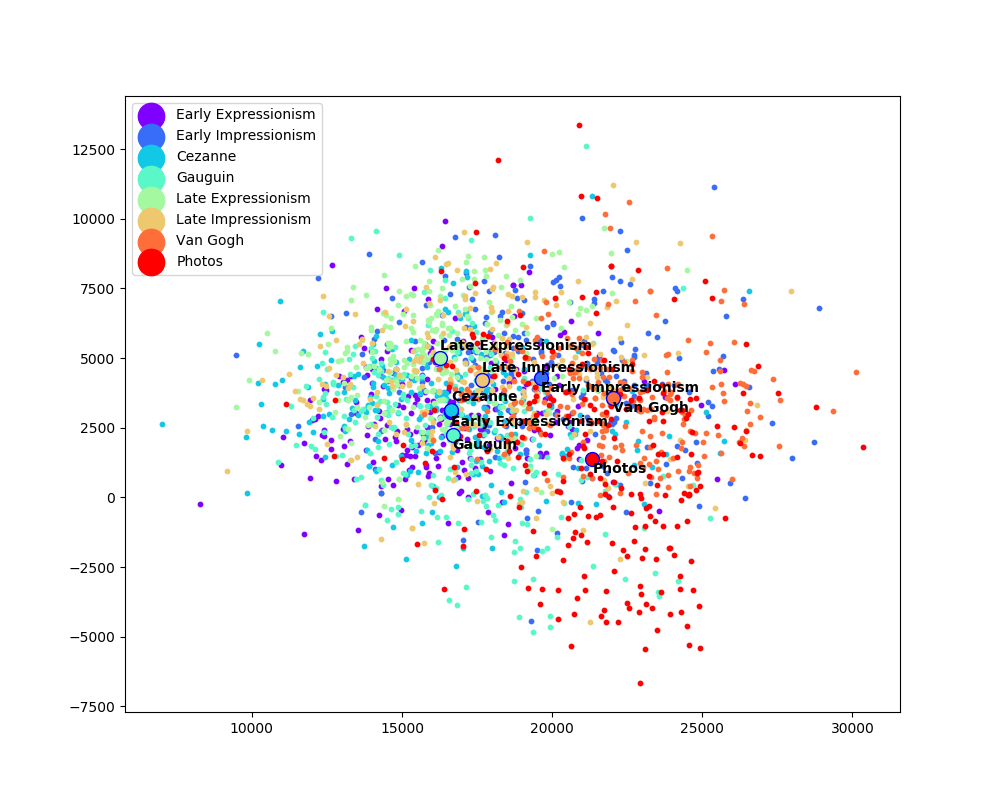

<IPython.core.display.Javascript object>


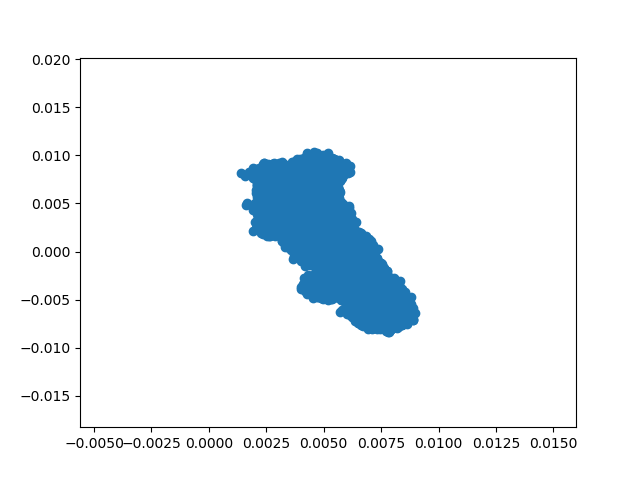

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
styles = ['Early Expressionism', 'Early Impressionism', 'Cezanne', 'Gauguin', 'Late Expressionism', 'Late Impressionism', 'Van Gogh','Photos']

# Project the data down into the two dimensional subspace
proj = immatrix @ pc.eigenvecs#eigenvec[:,0:2]

c = cm.rainbow(np.linspace(0, 1, 8))
# Plot projected data
fig = plt.figure('Data projected onto first two Principal Components',figsize=(10,8))
#fig.gca().set_xlim(-8, 8)
#fig.gca().set_ylim(-4, 7)
for i in range(8):
    plt.scatter(proj[247*i:247*(i+1),0], proj[247*i:247*(i+1),1],color=c[i],s=10)
for i in range(8):
    plt.scatter(np.mean(proj[247*i:247*(i+1),0]),np.mean(proj[247*i:247*(i+1),1]),color=c[i],s=100,marker='o', edgecolor='b')
    if i==2 or i ==5 or i ==4:#otherwise text overlaps and it doesn't look that nice
        plt.annotate(styles[i], (np.mean(proj[247*i:247*(i+1),0]),np.mean(proj[247*i:247*(i+1),1])+300),fontweight='bold')
    else:
        plt.annotate(styles[i], (np.mean(proj[247*i:247*(i+1),0]),np.mean(proj[247*i:247*(i+1),1])-500),fontweight='bold')

legend = plt.legend(('Early Expressionism', 'Early Impressionism', 'Cezanne', 'Gauguin', 'Late Expressionism', 'Late Impressionism', 'Van Gogh','Photos'),markerscale=6)
# force drawing on 'run all'
fig.canvas.draw()

# Plot eigenvectors
eig_fig = plt.figure('Eigenvector plot')
plt.scatter(pc.eigenvecs[:,0],pc.eigenvecs[:,1])
#plt.scatter(eigenvec[:,0], eigenvec[:,1])

eig_fig.canvas.draw()

### Plot 3D PCA Results

<IPython.core.display.Javascript object>


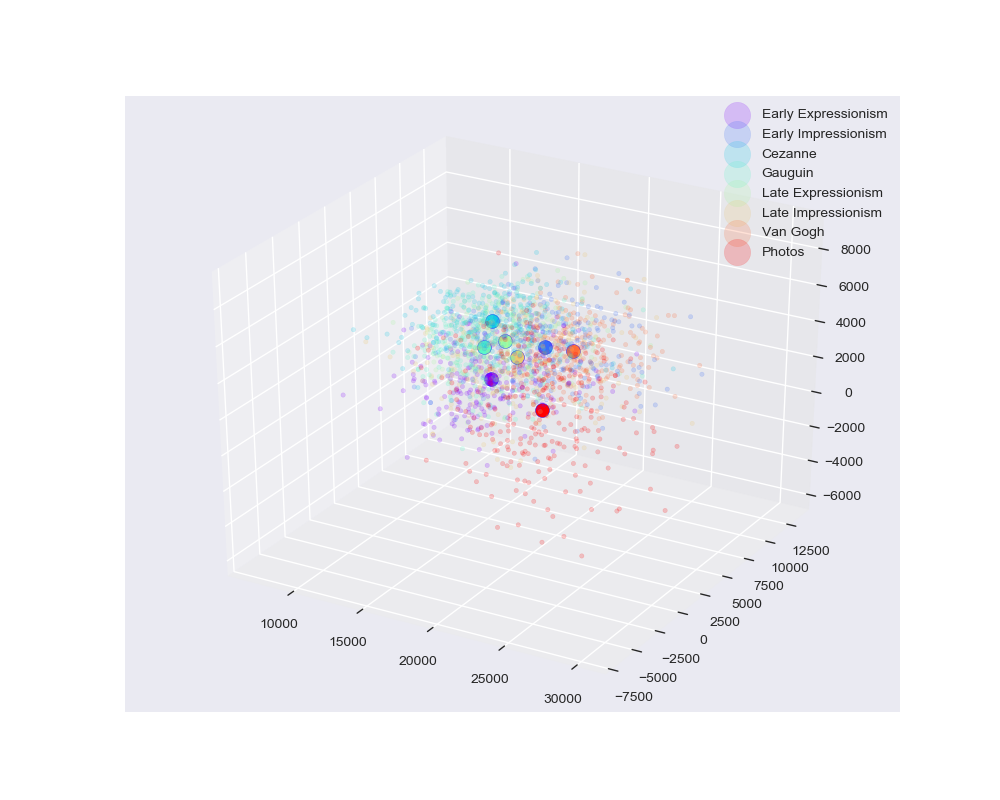

In [129]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
styles = ['Early Expressionism', 'Early Impressionism', 'Cezanne', 'Gauguin', 'Late Expressionism', 'Late Impressionism', 'Van Gogh','Photos']

# Project the data down into the two dimensional subspace
proj = immatrix @ pc.eigenvecs#eigenvec[:,0:2]

c = cm.rainbow(np.linspace(0, 1, 8))
# Plot projected data
fig = plt.figure('Data projected onto first two Principal Components',figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
means = np.zeros((8,3))
for i in range(8):
    ax.scatter(proj[247*i:247*(i+1),0], proj[247*i:247*(i+1),1], proj[247*i:247*(i+1),2],color=c[i],s=10, alpha=.2)
for i in range(8):
    ax.scatter(np.mean(proj[247*i:247*(i+1),0]),np.mean(proj[247*i:247*(i+1),1]),np.mean(proj[247*i:247*(i+1),2]),color=c[i],s=100,marker='o', edgecolor='b')
    means[i,0] = np.mean(proj[247*i:247*(i+1),0])
    means[i,1] = np.mean(proj[247*i:247*(i+1),1])
    means[i,2] = np.mean(proj[247*i:247*(i+1),2])
    if i==2 or i ==5 or i ==4:#otherwise text overlaps and it doesn't look that nice
        ax.annotate(styles[i], (np.mean(proj[247*i:247*(i+1),0]),np.mean(proj[247*i:247*(i+1),1])+300),fontweight='bold')
    else:
        ax.annotate(styles[i], (np.mean(proj[247*i:247*(i+1),0]),np.mean(proj[247*i:247*(i+1),1])-500),fontweight='bold')

legend = ax.legend(('Early Expressionism', 'Early Impressionism', 'Cezanne', 'Gauguin', 'Late Expressionism', 'Late Impressionism', 'Van Gogh','Photos'),markerscale=6)
# force drawing on 'run all'
fig.canvas.draw()

eig_fig.canvas.draw()

### Calculate Distance Matrix

<IPython.core.display.Javascript object>


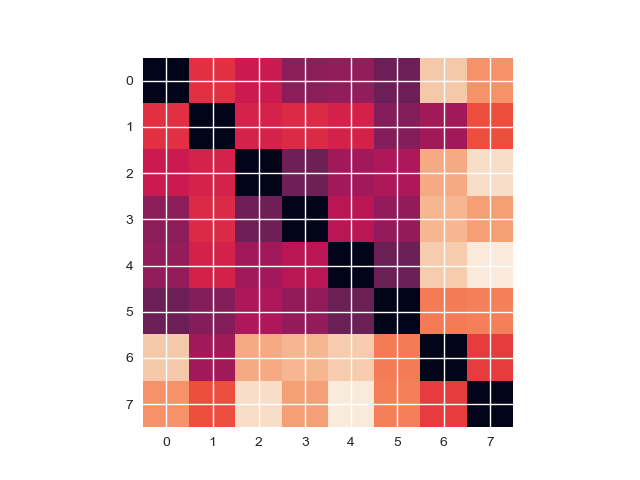

In [34]:
distmat = scipy.spatial.distance.cdist(means,means)
fig = plt.figure()
plt.imshow(distmat)
fig.canvas.draw()

### Plot Distance Matrix with Labels

<IPython.core.display.Javascript object>


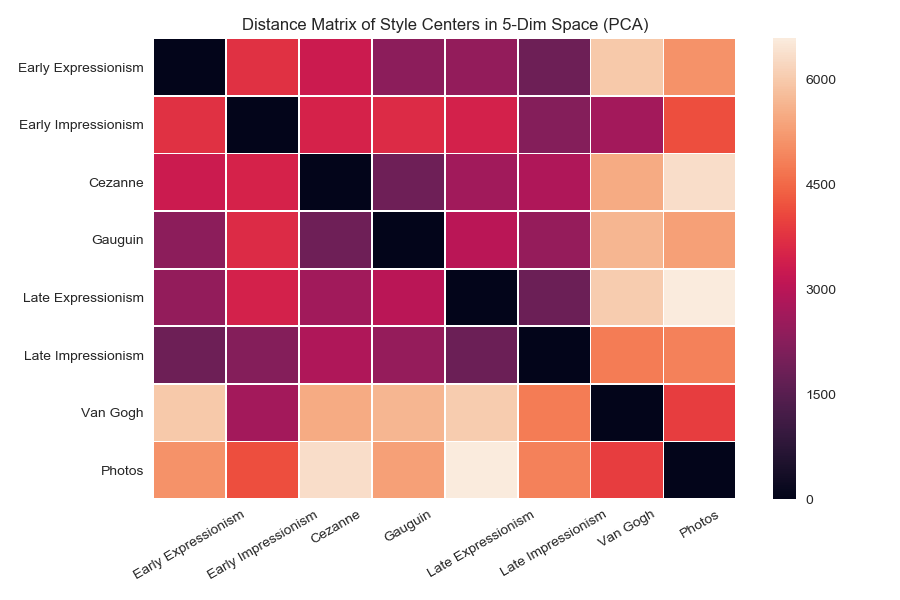

In [35]:
df = pd.DataFrame(distmat, columns=['Early Expressionism', 'Early Impressionism', 'Cezanne', 'Gauguin', 'Late Expressionism', 'Late Impressionism', 'Van Gogh','Photos'])

sns.set()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df, linewidths=.5, ax=ax)

ax.set_yticklabels(['Early Expressionism', 'Early Impressionism', 'Cezanne', 'Gauguin', 'Late Expressionism', 'Late Impressionism', 'Van Gogh','Photos'])
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.title("Distance Matrix of Style Centers in 5-Dim Space (PCA)")
plt.tight_layout()

### Create Hierarchical Clustering Based on the Distance Matrix

<IPython.core.display.Javascript object>


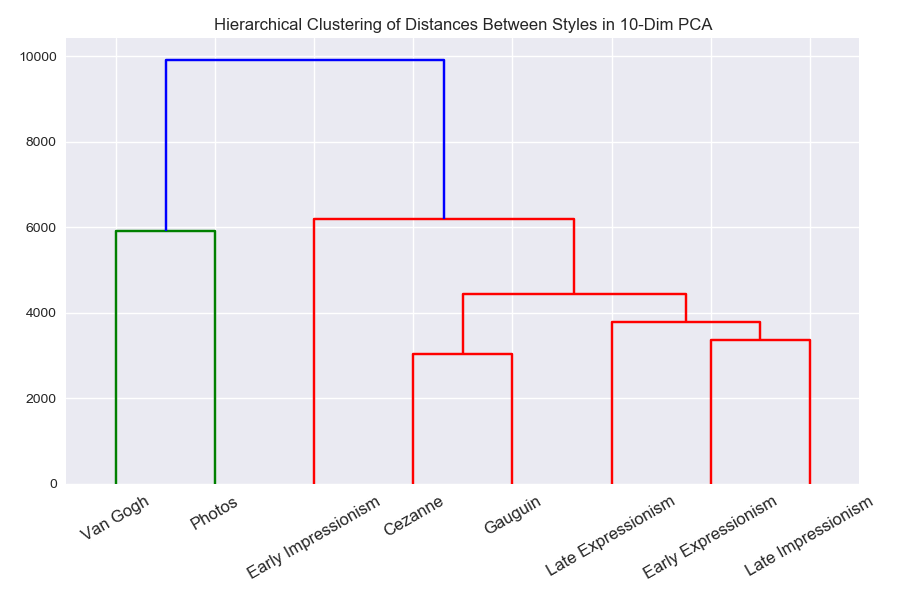

In [36]:
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage
#turnedmat = np.divide(1,distmat)
#turnedmat[turnedmat == inf] = 0
Z = linkage(distmat, 'average')
f, ax = plt.subplots(figsize=(9, 6))
dn = dendrogram(Z,labels=['Early Expressionism', 'Early Impressionism', 'Cezanne', 'Gauguin', 'Late Expressionism', 'Late Impressionism', 'Van Gogh','Photos'])
#ax.set_xticklabels(['Early Expressionism', 'Early Impressionism', 'Cezanne', 'Gauguin', 'Late Expressionism', 'Late Impressionism', 'Van Gogh','Photos'])
plt.xticks(rotation=30)
plt.title("Hierarchical Clustering of Distances Between Styles in 10-Dim PCA")
plt.tight_layout()
plt.show()